# IMPORT LIBRARY

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import datetime
from datetime import datetime
#!pip install xgboost
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.impute import KNNImputer


# IMPORT DATA SET

In [2]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [3]:
# Backup data

df1 = df.copy()

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# In this project, we dont need id number.
# Drop id column
df = df.drop(columns = ['id'])

In [6]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
df.shape

(5110, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


# DATA CLEANSING

## Missing Value

In [9]:
categorical = ['gender','ever_married','work_type','Residence_type','smoking_status']
numerical = ['age','hypertention','heart_disease','avg_glucose_level','bmi']

In [10]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
# Checking Missing Value based on distinct
for column in df[categorical].columns:
    print(f"============= {column} =================")
    display(df[categorical][column].value_counts())
    print()

============= gender =================


Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


============= ever_married =================


Yes    3353
No     1757
Name: ever_married, dtype: int64


============= work_type =================


Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


============= Residence_type =================


Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


============= smoking_status =================


never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


**Detecting Missing value :**
- There are 1 object detected as unknown data in column `gender` =>> drop the column
- There are 201 missing value in column `bmi` =>> drop them because it less than 10%
- There are 1544 missing value in column `smoking atatus` =>> investigate later

In [13]:
#Drop missing value on column `gender`

df = df[df['gender']!='Other']

In [14]:
# Drop missing value on column `bmi`

df = df[df['bmi'].notna()].reset_index(drop = True)

In [15]:
# check what's the percentage of missing value in column `smoking status`
100 * len(df[df['smoking_status'].isin(['Unknown'])]) / len(df)

30.2159739201304

Since the missing value is 20% < x < 50%, so I decided to fill it with mode of the data

In [16]:
# Mode imputation on smoking_status column

mode_smoke = df[~df['smoking_status'].isin(['Unknown'])]['smoking_status'].mode()[0]
#proses imputasi nilai
df['smoking_status'] = df['smoking_status'].apply(lambda x: mode_smoke if x in ['Unknown'] else x)

In [17]:
mode_smoke

'never smoked'

In [18]:
df['smoking_status'].value_counts()

never smoked       3335
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

**Missing value already handled, now it's time to recheck them again !**

In [19]:
# Rehecking Missing Value based on distinct
for column in df[categorical].columns:
    print(f"============= {column} =================")
    display(df[categorical][column].value_counts())
    print()

============= gender =================


Female    2897
Male      2011
Name: gender, dtype: int64


============= ever_married =================


Yes    3204
No     1704
Name: ever_married, dtype: int64


============= work_type =================


Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64


============= Residence_type =================


Urban    2490
Rural    2418
Name: Residence_type, dtype: int64


============= smoking_status =================


never smoked       3335
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 421.9+ KB


**DONE !**

## Handling Outlier

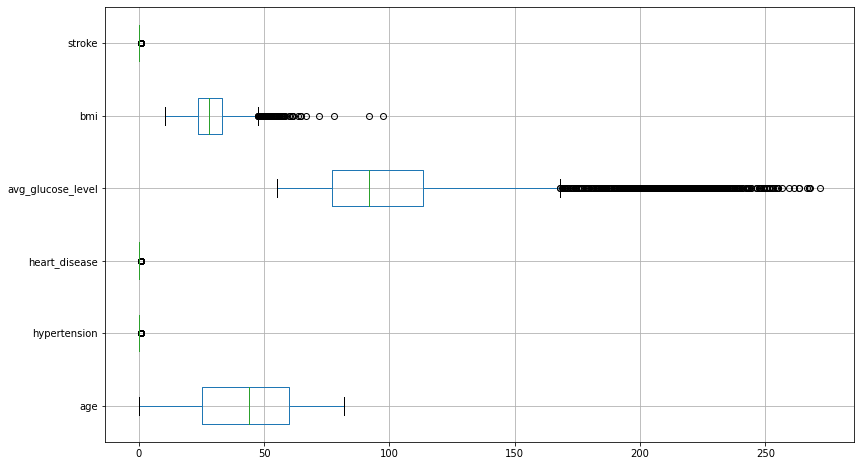

In [21]:
# Outlier Analysis

plt.figure(figsize=(16, 8))

# Create Boxplot
df.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.show()

**Although there are some outliers in this data, I assumed that all data was relevant and I decided not to delete them considering the validity of the data**

## Drop Duplicated Value

In [22]:
# number of duplicated data
df.duplicated().sum()

0

There is no duplicated values

# EXPLORATORY DATA ANALYSIS

**Data Dictionary:**

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [23]:
categorical = ['gender','ever_married','work_type','Residence_type','smoking_status']
numerical = ['age','hypertension','heart_disease','avg_glucose_level','bmi']


# Seperate the data based on stroke patient 
df_stroke = df[df['stroke']==1]

In [51]:
from google.colab import files

# e.g. save pandas output as csv
df.to_csv('stroke_clean.csv')

# or any other file as usual
# with open('example.csv', 'w') as f:
#   f.write('your strings here')

files.download('stroke_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
from google.colab import files

# e.g. save pandas output as csv
df_stroke.to_csv('stroke_patient_only.csv')

# or any other file as usual
# with open('example.csv', 'w') as f:
#   f.write('your strings here')

files.download('stroke_patient_only.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
df[categorical].describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,4908,4908,4908,4908,4908
unique,2,2,5,2,3
top,Female,Yes,Private,Urban,never smoked
freq,2897,3204,2810,2490,3335


In [26]:
df[numerical].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000
mean,42.868810,0.091891,0.049511,105.297402,28.89456
std,22.556128,0.288901,0.216954,44.425550,7.85432
min,0.080000,0.000000,0.000000,55.120000,10.30000
25%,25.000000,0.000000,0.000000,77.067500,23.50000
50%,44.000000,0.000000,0.000000,91.680000,28.10000
75%,60.000000,0.000000,0.000000,113.495000,33.10000
max,82.000000,1.000000,1.000000,271.740000,97.60000


**Describe about data set stroke patient only**

In [27]:
df_stroke[categorical].describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,209,209,209,209,209
unique,2,2,4,2,3
top,Female,Yes,Private,Urban,never smoked
freq,120,186,127,109,113


In [28]:
df_stroke[numerical].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi
count,209.000000,209.000000,209.000000,209.000000,209.000000
mean,67.712919,0.287081,0.191388,134.571388,30.471292
std,12.402848,0.453486,0.394338,62.462047,6.329452
min,14.000000,0.000000,0.000000,56.110000,16.900000
25%,58.000000,0.000000,0.000000,80.430000,26.400000
50%,70.000000,0.000000,0.000000,106.580000,29.700000
75%,78.000000,1.000000,0.000000,196.920000,33.700000
max,82.000000,1.000000,1.000000,271.740000,56.600000


In [29]:
def categorical_data(title):
    plt.figure(figsize=(17,8))
    g=sns.catplot(x=title,kind='count', hue="stroke", palette='viridis', data=df)
    ax = g.facet_axis(0,0)
    for p in ax.patches:
       ax.text(p.get_x() + 0.02, 
            p.get_height() * 1.02, 
            '{0:.2f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large')

<Figure size 1224x576 with 0 Axes>

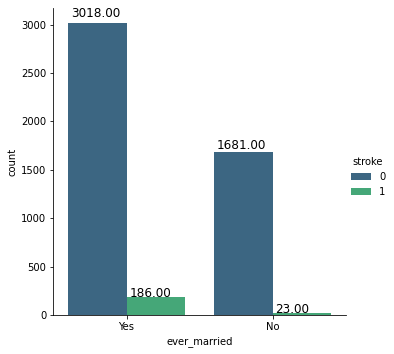

In [30]:
categorical_data("ever_married")

<Figure size 1224x576 with 0 Axes>

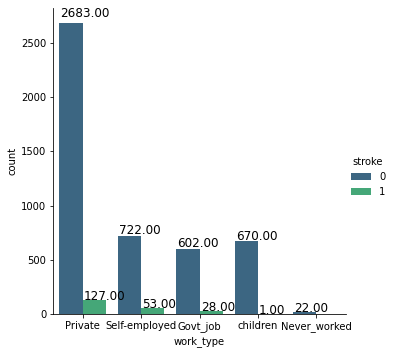

In [31]:
categorical_data("work_type")

<Figure size 1224x576 with 0 Axes>

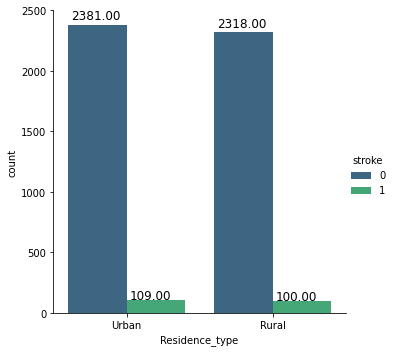

In [32]:
categorical_data("Residence_type")

<Figure size 1224x576 with 0 Axes>

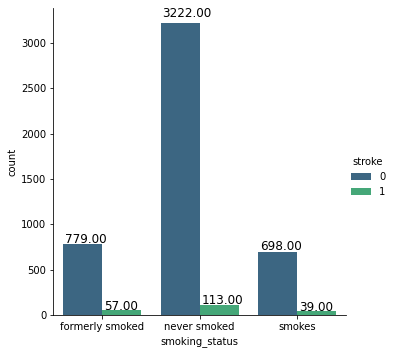

In [33]:
categorical_data("smoking_status")

<Figure size 1224x576 with 0 Axes>

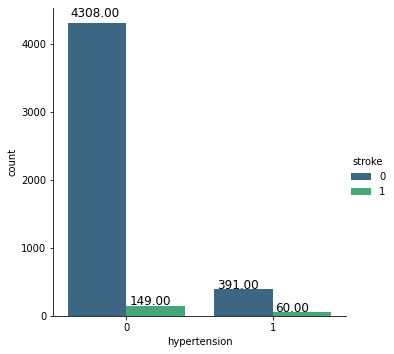

In [75]:
categorical_data("hypertension")

In [34]:
def num_data(title):
  #train = pd.concat([Xtrain,ytrain],axis=1)
  sns.FacetGrid(df,hue='stroke',palette='cubehelix',size=5 ).map(sns.distplot,title).add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


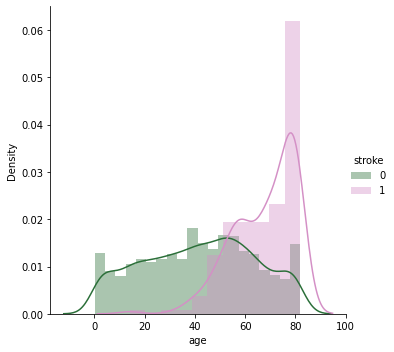

In [35]:
num_data('age')

In [72]:
def num_data(title):
  #train = pd.concat([Xtrain,ytrain],axis=1)
  sns.FacetGrid(df,hue='hypertension',palette='cubehelix',size=5 ).map(sns.distplot,title).add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


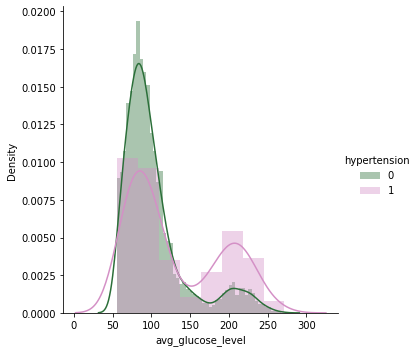

In [73]:
num_data('avg_glucose_level')

In [77]:
def num_data(title):
  #train = pd.concat([Xtrain,ytrain],axis=1)
  sns.FacetGrid(df,hue = 'stroke', palette='cubehelix',size=5 ).map(sns.distplot,title).add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


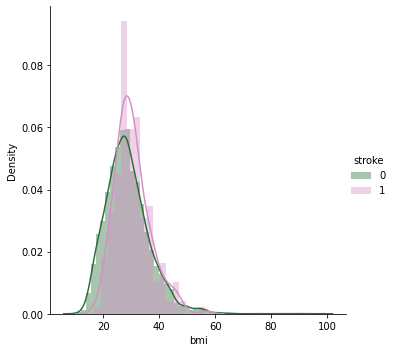

In [78]:
num_data('bmi')

## Based on Stroke Patient Data

In [36]:
df_stroke = df[df['stroke']==1]

In [37]:
df_stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,never smoked,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [38]:
gender_count = df_stroke.groupby(['gender'],as_index=False).size()

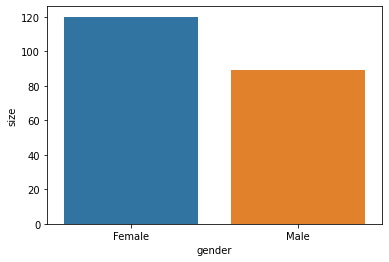

In [39]:
sns.barplot(x=gender_count['gender'],
            y=gender_count['size'])

In [40]:
married_count = df_stroke.groupby(['ever_married'],as_index=False).size()

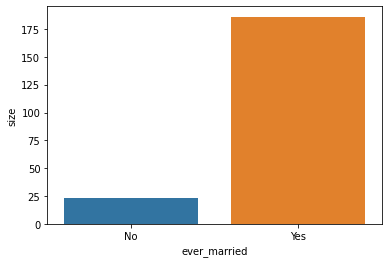

In [41]:
sns.barplot(x=married_count['ever_married'],
            y=married_count['size'])

In [42]:
# Construct a Dataset
smoking_count = df_stroke.groupby(['smoking_status'],as_index=False).size()

In [43]:
smoking_count

,smoking_status,size
0,formerly smoked,57
1,never smoked,113
2,smokes,39


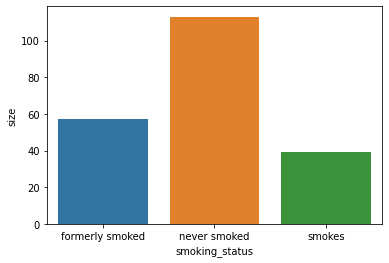

In [44]:
sns.barplot(x=smoking_count['smoking_status'],
            y=smoking_count['size'])

In [58]:
# Construct a Dataset
hyper_count = df_stroke.groupby(['hypertension'],as_index=False).size()

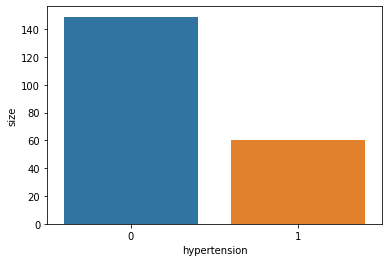

In [59]:
sns.barplot(x=hyper_count['hypertension'],
            y=hyper_count['size'])

In [45]:
# Construct a Dataset
wtype_count = df_stroke.groupby(['work_type'],as_index=False).size()

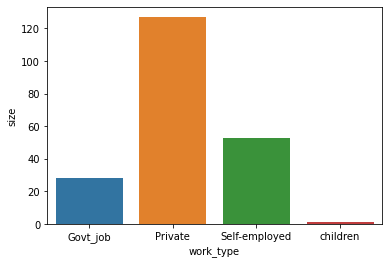

In [46]:
sns.barplot(x=wtype_count['work_type'],
            y=wtype_count['size'])

In [47]:
# Construct a Dataset
residence_count = df_stroke.groupby(['Residence_type'],as_index=False).size()

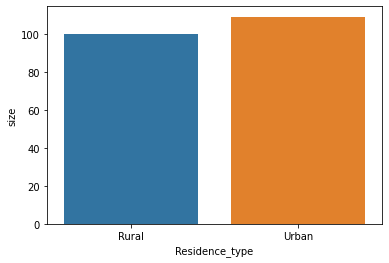

In [48]:
sns.barplot(x=residence_count['Residence_type'],
            y=residence_count['size'])

In [49]:
# Construct a Dataset
residence_count = df_stroke.groupby(['heart_disease'],as_index=False).size()

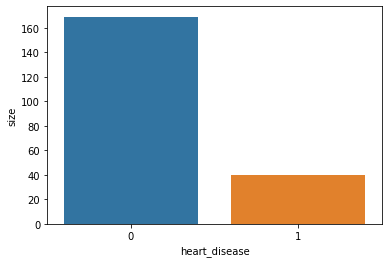

In [50]:
sns.barplot(x=residence_count['heart_disease'],
            y=residence_count['size'])

In [60]:
def num_data(title):
  #train = pd.concat([Xtrain,ytrain],axis=1)
  sns.FacetGrid(df_stroke,hue='hypertension',palette='cubehelix',size=5 ).map(sns.distplot,title).add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


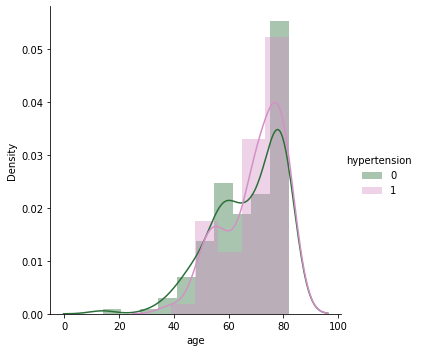

In [61]:
num_data('age')

In [37]:
def num_data(title):
  #train = pd.concat([Xtrain,ytrain],axis=1)
  sns.FacetGrid(df_stroke,hue='heart_disease',palette='cubehelix',size=5 ).map(sns.distplot,title).add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


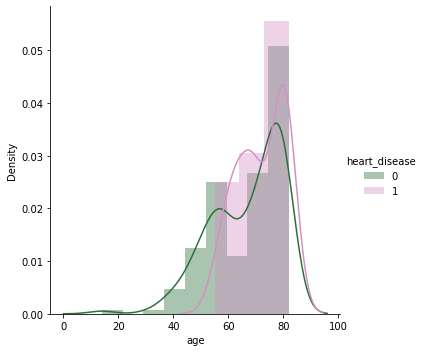

In [38]:
num_data('age')

In [67]:
def num_data(title):
  #train = pd.concat([Xtrain,ytrain],axis=1)
  sns.FacetGrid(df_stroke,palette='cubehelix',size=5 ).map(sns.distplot,title).add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


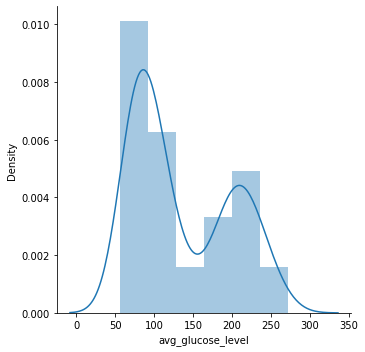

In [68]:
  num_data('avg_glucose_level')

In [82]:
def num_data(title):
  #train = pd.concat([Xtrain,ytrain],axis=1)
  sns.FacetGrid(df_stroke,hue='hypertension',palette='cubehelix',size=5 ).map(sns.distplot,title).add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


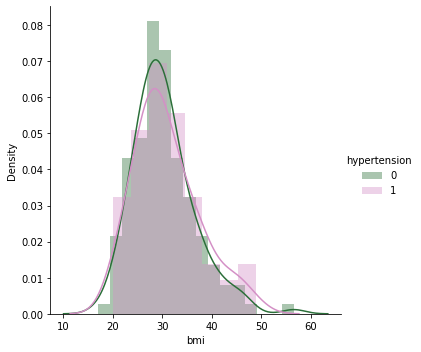

In [83]:
  num_data('bmi')

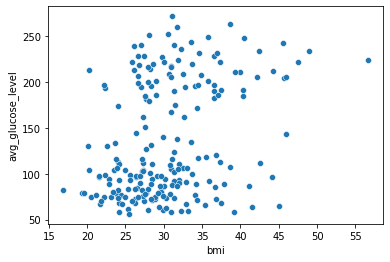

In [194]:
sns.scatterplot(x=df_stroke['bmi'],y=df_stroke['avg_glucose_level'])

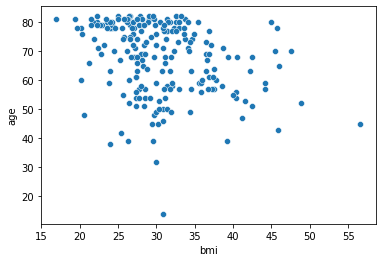

In [81]:
sns.scatterplot(x=df_stroke['bmi'],y=df_stroke['age'])

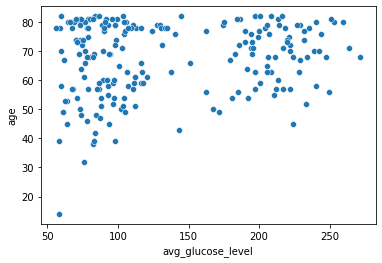

In [197]:
sns.scatterplot(x=df_stroke['avg_glucose_level'],y=df_stroke['age'])

In [186]:
def num_data(title):
  #train = pd.concat([Xtrain,ytrain],axis=1)
  sns.FacetGrid(df_stroke,palette='cubehelix',size=5 ).map(sns.distplot,title).add_legend()

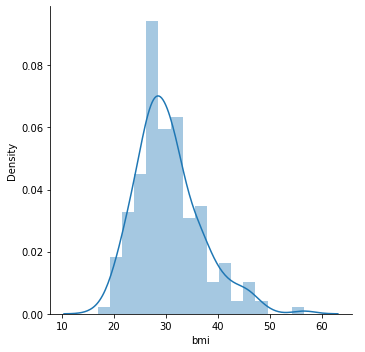

In [187]:
 num_data('bmi')

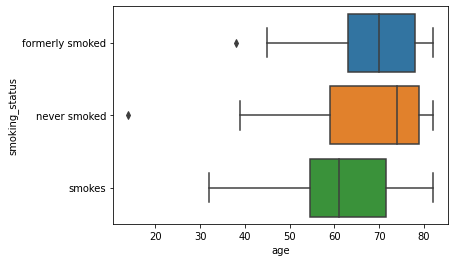

In [198]:
sns.boxplot(x=df_stroke['age'],
            y=df_stroke['smoking_status'])

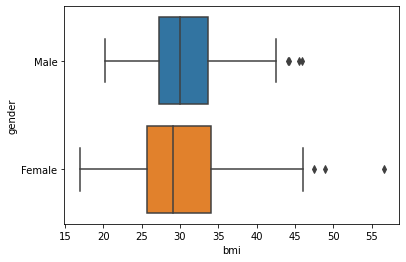

In [199]:
sns.boxplot(x=df_stroke['bmi'],
            y=df_stroke['gender'])

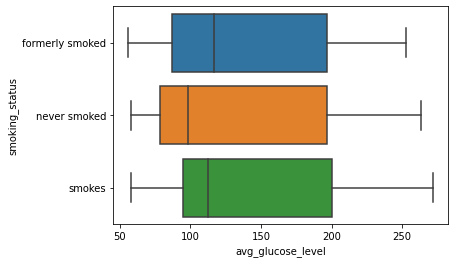

In [202]:
sns.boxplot(x=df_stroke['avg_glucose_level'],
            y=df_stroke['smoking_status'])

# CATEGORICAL COLUMN TRANSFORMATION

In [43]:
df['gender'].value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

In [44]:
### Onehot Encoding for gender, work_type','Residence_type','smoking_status'
onehot_columns = ['gender','work_type','Residence_type','smoking_status']
df = pd.get_dummies(df, columns = onehot_columns)

In [45]:
df.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,Yes,228.69,36.6,1,0,1,0,0,1,0,0,0,1,1,0,0
1,80.0,0,1,Yes,105.92,32.5,1,0,1,0,0,1,0,0,1,0,0,1,0
2,49.0,0,0,Yes,171.23,34.4,1,1,0,0,0,1,0,0,0,1,0,0,1
3,79.0,1,0,Yes,174.12,24.0,1,1,0,0,0,0,1,0,1,0,0,1,0
4,81.0,0,0,Yes,186.21,29.0,1,0,1,0,0,1,0,0,0,1,1,0,0


In [46]:
yes_no_dict = {
    'Yes':1,
    'No':0
}

for colname in ['ever_married']:
    df[colname] = df[colname].map(yes_no_dict)

In [47]:
df['ever_married'].value_counts()

1    3204
0    1704
Name: ever_married, dtype: int64

In [48]:
df.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,228.69,36.6,1,0,1,0,0,1,0,0,0,1,1,0,0
1,80.0,0,1,1,105.92,32.5,1,0,1,0,0,1,0,0,1,0,0,1,0
2,49.0,0,0,1,171.23,34.4,1,1,0,0,0,1,0,0,0,1,0,0,1
3,79.0,1,0,1,174.12,24.0,1,1,0,0,0,0,1,0,1,0,0,1,0
4,81.0,0,0,1,186.21,29.0,1,0,1,0,0,1,0,0,0,1,1,0,0


#DATA SET SPLITTING

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
df_train, df_test = train_test_split(df, 
                                     test_size = 0.25, random_state = 1) 

In [51]:
x_train_data = df_train.loc[:, df_train.columns!='stroke']
y_train_data = df_train.loc[:, df_train.columns=='stroke']

x_test_data = df_test.loc[:, df_test.columns!='stroke']
y_test_data = df_test.loc[:, df_test.columns=='stroke']

#RANDOM FOREST

In [52]:
# import random undersampling library 
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [53]:
Counter(y_train_data['stroke'])


Counter({0: 3530, 1: 151})

As we can see that the data is not balance, so we need to do some methods to make it balance

## Base Model

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [55]:
def evaluate(model, x_test = x_test_data, y_test = y_test_data):
    y_pred = model.predict(x_test)    
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', 2 * (precision * recall)/(precision + recall))
    

In [56]:
base_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
base_model.fit(x_train_data, y_train_data)
evaluate(base_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.9519152404237978
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1169
           1       0.00      0.00      0.00        58

    accuracy                           0.95      1227
   macro avg       0.48      0.50      0.49      1227
weighted avg       0.91      0.95      0.93      1227

------
Assuming 1 as positive, we get:

True Positive: 0
True Negative: 1168
False Positive: 1
False Negative: 58

Precision: 0.0
Recall: 0.0
F1-Score: nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


## Oversampling method

In [57]:
# import random undersampling library 
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print(Counter(y_train_data['stroke']))

# define undersample strategy
SMOTE = SMOTE()

# fit and apply the transform
x_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x_train_data, y_train_data)

# summarize class distribution
print(Counter(y_train_SMOTE['stroke']))

Counter({0: 3530, 1: 151})
Counter({0: 3530, 1: 3530})


In [58]:
over_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
over_model.fit(x_train_SMOTE, y_train_SMOTE)
evaluate(over_model, x_test_data, y_test_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.9494702526487367
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1169
           1       0.17      0.02      0.03        58

    accuracy                           0.95      1227
   macro avg       0.56      0.51      0.50      1227
weighted avg       0.92      0.95      0.93      1227

------
Assuming 1 as positive, we get:

True Positive: 1
True Negative: 1164
False Positive: 5
False Negative: 57

Precision: 0.16666666666666666
Recall: 0.017241379310344827
F1-Score: 0.03125


## Undersampling method

In [59]:
# import random undersampling library 
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print(Counter(y_train_data['stroke']))

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
x_train_under, y_train_under = undersample.fit_resample(x_train_data, 
                                                        y_train_data)

# summarize class distribution
print(Counter(y_train_under['stroke']))

Counter({0: 3530, 1: 151})
Counter({0: 151, 1: 151})


In [60]:
under_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
under_model.fit(x_train_under, y_train_under)
evaluate(under_model, x_test_data, y_test_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.7090464547677262
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.99      0.70      0.82      1169
           1       0.12      0.81      0.21        58

    accuracy                           0.71      1227
   macro avg       0.55      0.76      0.52      1227
weighted avg       0.95      0.71      0.79      1227

------
Assuming 1 as positive, we get:

True Positive: 47
True Negative: 823
False Positive: 346
False Negative: 11

Precision: 0.11959287531806616
Recall: 0.8103448275862069
F1-Score: 0.20842572062084255


## Combining Oversampling and Undersampling

Find the best coefficient

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from tqdm import tqdm

import warnings
warnings.simplefilter(action='ignore')

oversampling_coef = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
undersampling_coef = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

result = {
    'over_coef':[],
    'under_coef':[],
    'acc':[],
    'prec':[],
    'recall':[],
    'f1':[]
}

for over_score in tqdm(oversampling_coef):
    for under_score in undersampling_coef:
        try:
            combined_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
            over = SMOTE(sampling_strategy = over_score)
            under = RandomUnderSampler(sampling_strategy = under_score)
            steps = [('o', over), ('u', under), ('model', combined_model)]
            pipeline = Pipeline(steps = steps)

            pipeline.fit(x_train_data, y_train_data)
            y_pred = pipeline.predict(x_test_data)

            result['over_coef'].append(over_score)
            result['under_coef'].append(under_score)
            result['acc'].append(accuracy_score(y_test_data, y_pred))
            result['prec'].append(precision_score(y_test_data, y_pred))
            result['recall'].append(recall_score(y_test_data, y_pred))
            result['f1'].append(f1_score(y_test_data, y_pred))
        except:
            pass
        

100%|██████████| 10/10 [00:00<00:00, 4196.40it/s]


In [62]:
pd.DataFrame(result)

,over_coef,under_coef,acc,prec,recall,f1


In [63]:
df_combine = pd.DataFrame(result).sort_values(by = ['recall'],ascending = False)

In [64]:
df_combine.head()

,over_coef,under_coef,acc,prec,recall,f1


**This project aim is to reduce fals negatif, so we need to choose the highest value of Recall =>> (overcof 0.1 & undercof 1.0)**

In [65]:
# import needed libraries 
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# define pipeline
combined_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=1.0)
steps = [('o', over), ('u', under), ('model', combined_model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
pipeline.fit(x_train_data, y_train_data)
evaluate(pipeline, x_test_data, y_test_data)

Accuracy: 0.8255908720456397
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.98      0.84      0.90      1169
           1       0.16      0.62      0.25        58

    accuracy                           0.83      1227
   macro avg       0.57      0.73      0.58      1227
weighted avg       0.94      0.83      0.87      1227

------
Assuming 1 as positive, we get:

True Positive: 36
True Negative: 977
False Positive: 192
False Negative: 22

Precision: 0.15789473684210525
Recall: 0.6206896551724138
F1-Score: 0.2517482517482518


As we want to reduce false negatif then we have to choose the highest recall value =>> Undersampling (Recall = 0.8275862068965517)

# CONCLUSION

As we want to reduce false negatif on this case, then we have to choose the highest recall value =>> Undersampling 
(Recall = 0.8275862068965517)
